In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import linear_model
np.set_printoptions(linewidth=100)
np.random.seed(1)
m=5
n=5

A = (np.arange(1,6) + np.random.randn(m,n) * 0.25)
A[1,:] *= 2
A[2,:] *= 3
A[3,:] *= 4
A[4,:] *= 5
b = np.arange(1, 6)
#A is five independent variables with five values each
#b is a dependent variable with five observed values
print(A)
print(b)

#Make a scatterplot for the dependent and first independent variable
plt.figure(figsize=(4,4))
plt.scatter(np.arange(1,6), A[0,:])

#Calculate the weights the hard way
x = np.dot(np.linalg.inv(np.matmul(A.T, A)), np.dot(A.T, np.arange(1, 6)))
display("x (weights): ", x)

#Now use sk to build a model
lr = sk.linear_model.LinearRegression()

lr.fit(A, b)

#Compare the manual model with the sk model
for rec in np.arange(0,4):
    display(["sk: ", lr.predict(A[rec,:].reshape(1,-1))])
    display(["me: ", np.dot(A[rec,:], x)])

[[ 1.40608634  1.8470609   2.86795706  3.73175784  5.21635191]
 [ 0.84923065  4.87240588  5.61939655  8.15951955  9.87531481]
 [ 4.09658095  4.45489447  8.7581871  11.71195923 15.85032708]
 [ 2.90010873  7.82757179 11.12214158 16.04221375 20.58281521]
 [ 3.62422603 11.43090464 16.1269884  20.62811792 26.12606994]]
[1 2 3 4 5]


'x (weights): '

array([ 0.08953732,  0.0718547 , -0.11251073,  0.17508985,  0.07872663])

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


['sk: ', array([1.])]

['me: ', 0.999999999996746]

['sk: ', array([2.])]

['me: ', 1.9999999999899325]

['sk: ', array([3.])]

['me: ', 2.999999999997553]

['sk: ', array([4.])]

['me: ', 3.9999999999875016]

[2. 0.]
[0. 3.]


/usr/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


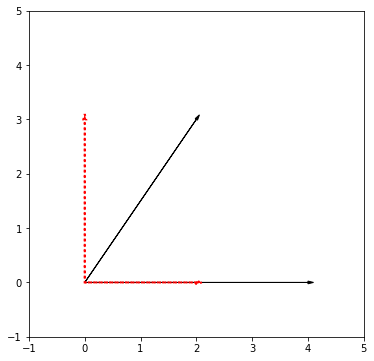

In [3]:
#Orthogoanal and parallel vector components
#decompose a vector into parallel and perpendicular components compared to a reference vector
#not clear yet what purpose/application is
def plotvec(v, linewidth=1, linestyle='-', color='black'):
    plt.axes().arrow(0,0, *v, head_width=0.05, head_length=0.1, linestyle=linestyle, linewidth=linewidth, color=color)
w = np.array([4.,0.])
v = np.array([2.,3.])
v_perp = np.dot(w, np.dot(w,v)/np.dot(w,w))
v_par = v - v_perp
print(v_perp)
print(v_par)
#plt.axes().arrow(0,0,*v, head_width=0.05, head_length=0.1)
#plt.axes().arrow(0,0, *w, head_width=0.05, head_length=0.1)
plt.figure(figsize=(6,6))
plotvec(v)
plotvec(w)
plotvec(v_perp, 2, ':', 'red')
plotvec(v_par, 2, ':', 'red')
plt.xlim((-1,5))
plt.ylim(-1,5)
plt.show()

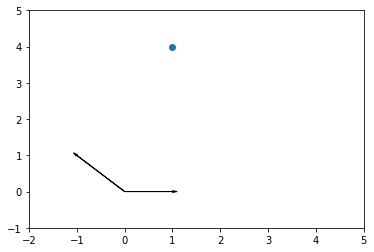

A
[[ 1  0]
 [-1  1]]
AtA
[[ 2 -1]
 [-1  1]]
AtA^-1
[[1. 1.]
 [1. 2.]]
beta
[1. 5.]
A inv
[[1. 0.]
 [1. 1.]]
A inv * beta (produces b)
[1. 4.]


In [42]:
#project point onto 2x2 matrix in R2
A = np.array([[1,0], [-1, 1]])
plt.ylim([-1, 5])
plt.xlim(-2, 5)
plotvec(A[0,:])
plotvec(A[1,:])
b = np.array([1,4])
#plotvec(b, color='b')
plt.plot(b[0], b[1], marker='o')
plt.show()

AtA = np.matmul(A.T, A)
AtAinv = np.linalg.inv(AtA)
Ainv = np.linalg.inv(A)
beta = np.matmul(AtAinv, np.matmul(A.T, b))
print("A")
print(A)
print("AtA")
print(AtA)
print("AtA^-1")
print(AtAinv)
print("beta")
print(beta)

print("A inv")
print(Ainv)
#beta times the original matrix A gives b
print("A inv * beta (produces b)")
print(np.matmul(A, beta))

In [24]:
A = np.array([[1.,0], [0,1]])
b = np.array([1.,1])
x = np.matmul(np.linalg.inv(np.matmul(A.T, A)), np.matmul(A.T, b))
#The distance between b and A, the matrix onto which it is projected, is zero
print(b - np.matmul(A, x))

[0. 0.]


In [40]:
#This time A spans a plan in R2 in the ambient space of R3
A = np.array([[1,0,0], [0,1,0],[0,0,0]])
#b is a line not on the plane
b = np.array([0,0.1,0.1])
AtA = np.matmul(A.T, A)
Atb = np.matmul(A.T, b)
pinv = np.linalg.pinv(AtA)
print("A.T * A")
print(AtA)
print("Pseudo inverse of A.T * A")
print(pinv)
#Have to use pseduoinverse this time as A.T*A is singular
x = np.matmul(pinv, Atb)
#The distance between b and A, the matrix onto which it is projected, is zero
print("b - A.T * x")
print(b - np.matmul(A, x))

A.T * A
[[1 0 0]
 [0 1 0]
 [0 0 0]]
Pseudo inverse of A.T * A
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
b - A.T * x
[0.  0.  0.1]


In [39]:
A = np.array([[1,0],[0,1],[0.1,0.1]])
b = np.array([0,0.1,0.1])
AtA = np.matmul(A.T, A)
Atb = np.matmul(A.T, b)
print(np.linalg.solve(AtA, Atb))

[0.00882353 0.10882353]


In [50]:
#Example of a vector in R3 being projected onto a 2D plane in R3, but the matrix A is 3x3.
#The matrix has zero vector for one row (or column) so it has no inverse.
#So the np.linalg.solve method won't work.
A = np.array([[1,0,0],[0,1,0],[0,0,0]])
b = np.array([1,1,1])
print(A)
AtA = np.matmul(A.T, A)
Atb = np.matmul(A.T, b)
#print(np.linalg.solve(AtA, Atb))
x = np.matmul(np.linalg.pinv(AtA), AtB)
print(x)
#Why is the answer the zero vector? I guess because, even though A has zeroes for the 3rd dimension,
#A is still defined in R3?

[[1 0 0]
 [0 1 0]
 [0 0 0]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
[0. 0. 0.]
